Here's a simple example of a PyTorch program for the MNIST dataset. This example will use a simple feed-forward neural network.
The provided code is a simple implementation of a neural network that learns to classify the MNIST dataset, which consists of 28x28 pixel images of handwritten digits (0-9).

# Here's a high-level view of what's happening:

#### Data Loading: 
The code first downloads the MNIST dataset and sets it up in PyTorch DataLoader objects, which will efficiently generate mini-batches of the data during training.

#### Model Definition: 
A simple feed-forward neural network is defined with one hidden layer and a ReLU (Rectified Linear Unit) activation function.

#### Training: 
The model is then trained over a certain number of epochs (full passes through the training dataset). During each epoch, it uses backpropagation and gradient descent to adjust the model's weights based on its performance.

#### Testing: 
After training, the model's performance is evaluated on a test set (which the model has not seen during training).

# Now, let's go through the code step by step:

#### Import Libraries: 
All the necessary libraries are imported first. These include torch, torch.nn for the neural network, torchvision for downloading and loading the MNIST dataset, and torchvision.transforms for preprocessing the images.

In [1]:
# Import required modules
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms

#### Define the Device: 
The code sets the device to be used for computations, either CPU or GPU, depending on what's available.

In [2]:
# Define the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### Hyperparameters Definition: 
Some hyperparameters are set, such as the input size (28x28 pixels for MNIST images, hence 784), the hidden layer size, the number of output classes (10 digits), the number of epochs (complete passes through the dataset), the batch size, and the learning rate.

In [3]:
# Hyper-parameters 
input_size = 784 # 28x28
hidden_size = 500 
num_classes = 10 
num_epochs = 5
batch_size = 100
learning_rate = 0.001

#### Load the Dataset: 
The MNIST dataset is downloaded and loaded into memory. The images are transformed into tensors using transforms.ToTensor().

In [4]:
# MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

1.2%

100.1%

Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw


3.0%5%

Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw


180.4%C:\Users\Sandisk\anaconda3\envs\pytorch171_cu110\lib\site-packages\torchvision\datasets\mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw
Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw
Processing...
Done!


#### DataLoader Definition: 
PyTorch's DataLoader is defined for both the training and testing datasets. It allows efficient iteration over the data.
"train_dataset" provides the interface for accessing your data, and "train_loader" provides an iterator to loop over the data in manageable batches, rather than loading the entire dataset into memory at once. This is especially important when working with large datasets that don't fit into memory.

In [69]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

#### Data visualization:

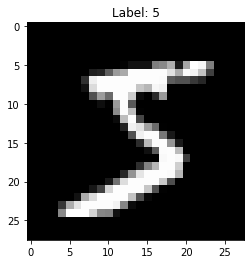

In [70]:
import matplotlib.pyplot as plt

# Choose an index of an image you want to display
image_index = 0 

# Access the image and label at the chosen index
image, label = train_dataset[image_index] #or we can use: image, label = train_loader.dataset[image_index]

# Display the image and its label
plt.imshow(image.squeeze(), cmap='gray')
plt.title(f"Label: {label}")
plt.show()

#### Neural Network Definition: 
A simple neural network with one hidden layer and a ReLU activation function is defined.


In [6]:
# Fully connected neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__() 
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes).to(device)

Line-by-line explanation:

##### class NeuralNet(nn.Module): 
We define a class NeuralNet that inherits from nn.Module. nn.Module is the base class for all neural network modules in PyTorch. Our network is a subclass of it. When you see 'class NeuralNet(nn.Module):', think of it as "I'm creating a new PyTorch neural network class that has all the standard features of a PyTorch network".

##### def _ _ init _ _(self, input_size, hidden_size, num_classes): 
This is the initializer of the class. It takes as input the size of the input layer, the size of the hidden layer, and the number of classes (output size).

##### super(NeuralNet, self)._ _ init _ _(): 
This calls the initializer of the parent class (nn.Module). This is necessary for the PyTorch internals to work correctly. In Python 3, you can simply write "super()._ _ init _ _()"

##### self.fc1 = nn.Linear(input_size, hidden_size): 
This creates a fully connected layer (fc1) that connects the input to the hidden layer. It has input_size number of inputs and hidden_size number of outputs.

##### self.relu = nn.ReLU(): 
This defines the activation function ReLU (Rectified Linear Unit) which will be applied after the first fully connected layer.

##### self.fc2 = nn.Linear(hidden_size, num_classes): 
This creates another fully connected layer (fc2) that connects the hidden layer to the output layer. It has hidden_size number of inputs and num_classes number of outputs.

##### def forward(self, x): 
This defines the forward pass function. It takes as input a batch of images x.

##### out = self.fc1(x), out = self.relu(out), out = self.fc2(out): 
These lines implement the actual forward pass. The input data is passed through fc1, then the ReLU activation function is applied to the outputs of fc1, and then the result is passed through fc2.

##### return out: 
The output of the network is returned.

##### model = NeuralNet(input_size, hidden_size, num_classes).to(device): 
An instance of the NeuralNet class is created. This line also moves the model to the GPU if one is available. The device object was defined earlier in the code as device = torch.device('cuda' if torch.cuda.is_available() else 'cpu').

#### Loss Function and Optimizer: 
The loss function (CrossEntropyLoss in this case, suitable for multi-class classification) and the optimizer (Adam) are defined.

In [7]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  
# Adam, which is a type of gradient descent method that adapts the learning rate for each weight in the model. 
# We pass it our model's parameters and the learning rate we defined earlier.

#### Training Loop: 
The training loop is where the model learns. For each epoch, and each batch of images and labels, the model does a forward pass (computes the output and loss), a backward pass (computes the gradients), and an optimization step (updates the model parameters).

In [8]:
# Train the model
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # Move tensors to the configured device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item()}')

Epoch [1/5], Step [100/600], Loss: 0.5041453838348389
Epoch [1/5], Step [200/600], Loss: 0.410756379365921
Epoch [1/5], Step [300/600], Loss: 0.10506825149059296
Epoch [1/5], Step [400/600], Loss: 0.12469432502985
Epoch [1/5], Step [500/600], Loss: 0.12765644490718842
Epoch [1/5], Step [600/600], Loss: 0.11365668475627899
Epoch [2/5], Step [100/600], Loss: 0.23069995641708374
Epoch [2/5], Step [200/600], Loss: 0.1140487864613533
Epoch [2/5], Step [300/600], Loss: 0.14248181879520416
Epoch [2/5], Step [400/600], Loss: 0.08079265803098679
Epoch [2/5], Step [500/600], Loss: 0.15917660295963287
Epoch [2/5], Step [600/600], Loss: 0.09922943264245987
Epoch [3/5], Step [100/600], Loss: 0.11063677817583084
Epoch [3/5], Step [200/600], Loss: 0.15619051456451416
Epoch [3/5], Step [300/600], Loss: 0.06903975456953049
Epoch [3/5], Step [400/600], Loss: 0.07276370376348495
Epoch [3/5], Step [500/600], Loss: 0.12367439270019531
Epoch [3/5], Step [600/600], Loss: 0.05386575683951378
Epoch [4/5], Step

##### for i, (images, labels) in enumerate(train_loader): 
This line starts a loop over our training data loader. This loop will yield batches of images and their corresponding labels.

##### images = images.reshape(-1, 28*28).to(device), labels = labels.to(device): 
These lines reshape our images into vectors (since our model is a simple fully connected neural network and can't handle 2D images) and moves the images and labels to the GPU if available.

##### outputs = model(images): 
Here we pass our images to our model, which performs a forward pass through the network and returns the output. When you call an instance of your model like a function (like outputs = model(images) in your code), under the hood, PyTorch actually calls your model's forward method. This is done through the _ _ call _ _ method implemented in the base nn.Module class, which your model inherits from. In this code, when you do "outputs = model(images)", it's equivalent to doing "outputs = model.forward(images)". But the recommended way is to call the model instance directly because it's not only shorter, but also because the _ _ call _ _ method includes some additional steps before and after the forward pass (like handling nn.Module hooks).

##### loss = criterion(outputs, labels): 
The output of our model and the true labels are passed to our loss function, which calculates the loss - a measure of how far our model's predictions are from the true values.

##### optimizer.zero_grad(): 
This line resets all gradients in the model. This is important because PyTorch accumulates gradients.

##### loss.backward(): 
This line calculates the gradient of the loss with respect to the model parameters. This is done using the backpropagation algorithm.

##### optimizer.step(): 
This line performs a parameter update based on the currently calculated gradients stored in the model parameters.

##### if (i+1) % 100 == 0: ...: 
This line of code is logging our training progress. Every 100 batches, it prints out the current epoch and batch number, and the loss on that batch.

#### Testing: 
Finally, the model is evaluated on the test dataset. Gradients are not needed for this step, so torch.no_grad() is used to save memory. The percentage of correctly classified images is printed out.

In [9]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')

Accuracy of the network on the 10000 test images: 97.92 %


##### with torch.no_grad(): 
This context manager tells PyTorch that we do not want to compute or store gradients in the following block of code. This reduces memory usage and speeds up computation, and is useful when we're only doing forward passes through the network, like during inference/testing.

##### correct = 0, total = 0: 
We set up counters for the total number of predictions and the number of correct predictions.

##### for images, labels in test_loader: 
This starts a loop over the test data loader. For each iteration, it gives a batch of images and their corresponding labels.

##### images = images.reshape(-1, 28*28).to(device), labels = labels.to(device): 
These lines reshape our images into vectors and move the images and labels to the GPU if available.

##### outputs = model(images): 
Here we pass our images to our model, which performs a forward pass through the network and returns the output.

##### _, predicted = torch.max(outputs.data, 1): 
This line gets the class with the highest prediction probability from our model's output. The torch.max() function returns both the maximum value and the index of the maximum value along a given dimension (in this case, dimension 1, which is the dimension of the class probabilities). We only want the indices (i.e., the predicted classes), so we ignore the first output (_) and save the second output (predicted).

##### total += labels.size(0): 
This increments the total count by the batch size (the number of images in the current batch).

##### correct += (predicted == labels).sum().item(): 
This increments the correct count by the number of correct predictions in the current batch.

##### print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %'): 
Finally, we print out the accuracy of our model on the test set, which is the percentage of correct predictions.